In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../Data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()


In [2]:
import scipy.stats as stat
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.special import erf

In [3]:
%matplotlib inline

In [10]:
def half_frame(sub, xaxis_label, yaxis_label, font_size = 15, padding = -0.02):
    """Formats frame, axes, and ticks for matplotlib made graphic with half frame."""

    # Format graph frame and tick marks
    sub.yaxis.set_ticks_position('left')
    sub.xaxis.set_ticks_position('bottom')
    sub.tick_params(axis = 'both', which = 'major', length = 7, width = 2, direction = 'out', pad = 10,
                    labelsize = font_size)
    sub.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, direction = 'out', labelsize = 10)
    for axis in ['bottom','left']:
        sub.spines[axis].set_linewidth(2)
        sub.spines[axis].set_position(("axes", padding))
    for axis in ['top','right']:
        sub.spines[axis].set_visible(False)

    # Format axes
    sub.set_xlabel(xaxis_label, fontsize = 1.6 * font_size)
    sub.set_ylabel(yaxis_label, fontsize = 1.6 * font_size)
    
    return


# Statistics

**Statistics is the science concerned with the study of the collection, analysis, interpretation, presentation, and organization of data.**

For concreteness let us consider two examples that hopefully you can relate to.

The US Census Bureau collects data on people residing in the US. The data includes measures such as the number of household occupants, their gender, their age, their familial relationships, their incomes, their education levels, and so on. The process for the data collection is called a **census** because the process aims to measure all individuals.

Colleges collect applications for their programs. The data collected includes standardized test scores, GPAs, essays, recommendation letters, and so on. No college is able to collect a census, so each must make decisions based on the **sample** of applicants. Each college is able to analyze a sample comprising a very small fraction of all students applying to college each year.  

+++

## GPAs of applicants to Chemical Engineering Graduate Program


In order to explore how to perform statistical analysis with Python, we will start by studying the undergraduate GPA of the applicants to the Chemical Engineering Graduate Program in 2014.

### Import the data

If you look at the contents of the file, this is what you see:

`GPA UG,GPA UG Max`

`9.1,10`

`"3.61, 3.65 (updated)",4`

`3.27,4`

`3.966,4`

These data have lots of mistakes. For simplicity, we are only going to consider here data that has no issues and for which the maximum GPA is 4.0.

In [4]:
with open("../Data/gpa_data.csv", "r") as data_file:
    all_lines = data_file.readlines()

gpa_list = []
for line in all_lines[1:]:      # Ignore first line with field names
    gpa_list.append( line.strip().split(",") )
    
print(len(gpa_list), gpa_list[:3])
    
gpa = []
for x in gpa_list:
    try:
        if (float(x[1]) == 4.):  # consider only cases for which maximum GPA is 4.0
            try:
                gpa.append(float(x[0]))
            except:
                pass
    except:
        pass

print(len(gpa), gpa[:3])

364 [['9.1', '10'], ['"3.61', ' 3.65 (updated)"', '4'], ['3.27', '4']]
237 [3.27, 3.966, 3.25]


### Descriptive statistics

The first step in the analysis of data is to to obtain a description that summarizes its statistical properties. There are a number of statistics (that is, measures that can be calculated for that data) that are particularly useful.

**Number of observations** is the number of data in the data set. In this case, the number of applicants for which we have GPA values.

**Minimum** is the smallest value in the data set.

**Maximum** is the largest value in the data set. For the GPA data, this is presumably 4.0.

**Support** (also called range) is the interval over which the values of the data set spread. Since GAPs are positive and must be no larger that 4, we know that the range must be a subset of the interval [0, 4]. Presumably, students will GPAs lower than 2 will not apply to a graduate program, so the support of our GPA data will likely be a subset of the interval [2, 4].

**Mode** is the most common value in the data set.  

**Median** is the value that is larger than half of all values and smaller than half of all values in the data set. The median is an example of a *percentile*.  Two other common percentiles are the *first quartile* and the *third quartile*.

**Sample Mean** (also called sample average) is the sum of all values divided by the number of observations.  The sample mean has the smallest distance to the set of all values in the sample.

**Standard deviation** is a measure of the spread around the sample mean for the values in the data set.

**Skewness** is a measure of the asymmetry of the values in the data set. If you divide the support of the data at the sample mean, and if one of the interval is longer than the other, than the data is skewed.

These quantities can all be easily obtained used methods already coded in `Scipy` and `Numpy`.


In [9]:
#import scipy.stats as stat
#import numpy as np

mode = float(stat.mode(gpa)[0])
print("The mode of the sample is {0:4.2f}".format(mode))

first_quartile = stat.scoreatpercentile(gpa, 25)
print("The first quartile of the sample is {0:4.2f}".format(first_quartile))

median = stat.scoreatpercentile(gpa, 50)
print("The median of the sample is {0:4.2f}".format(median))

third_quartile = stat.scoreatpercentile(gpa, 75)
print("The third quartile of the sample is {0:4.2f}".format(third_quartile))

skew = stat.skew(gpa)
print("The skewness of the sample is {0:5.3f}".format(skew))

The mode of the sample is 3.80
The first quartile of the sample is 3.47
The median of the sample is 3.64
The third quartile of the sample is 3.80
The skewness of the sample is -0.947


In [6]:
results = stat.describe(gpa)

print(results)

print()
print(str(results).split('('))

# Let's prettify these results so that they are easier to read by humans
# You code here!


DescribeResult(nobs=237, minmax=(2.5099999999999998, 4.0), mean=3.6090717299578059, variance=0.070637761782164063, skewness=-0.9467689646282466, kurtosis=1.261852750991908)

['DescribeResult', 'nobs=237, minmax=', '2.5099999999999998, 4.0), mean=3.6090717299578059, variance=0.070637761782164063, skewness=-0.9467689646282466, kurtosis=1.261852750991908)']


### Plot the distribution

While descriptive statistics are very useful, their calculation involves the loss of a lot of information on the data.  Obtaining an histogram of the data values gives a much more accurate picture of the statistical properties of the data *as long as the histogram is calculated properly*. 

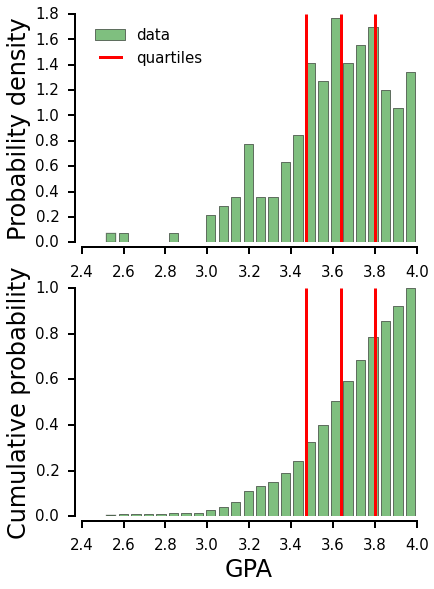

In [13]:
fig = plt.figure( figsize = (6, 9) )
sub1 = fig.add_subplot(2,1,1)
my_font_size = 15

half_frame(sub1, "", "Probability density", font_size = my_font_size)

# Calculate and plot histogram
#
sub1.hist(gpa, 25, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = False)

sub1.vlines([first_quartile, median, third_quartile], ymin = 0, ymax = 1.8, lw = 3, color = "red", 
            label = "quartiles")

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

# Plot cumulative probability
#
sub2 = fig.add_subplot(2,1,2)
half_frame(sub2, "GPA", "Cumulative probability", font_size = my_font_size)
sub2.hist(gpa, 25, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = True)
sub2.vlines([first_quartile, median, third_quartile], ymin = 0, ymax = 1., lw = 3, color = "red", 
            label = "quartiles")

plt.show()

## Pre-defined distributions

The `stats` library of `Scipy` also gives you access to lots of modules for well-known distributions.  These include, **but are not at all limited to**,  the binomial, the Poisson, and the Gaussian.

**Binomial distributions** occurs as the result of the repetition of independent trials. Flipping a coin several times.  Throwing one or more dice.

A fair coin has 50% chance of landing on heads and a 50% chance of landing on tails. The binomial distribution with p = 0.5 and n = 50 specifies the probability of tossing k heads. 

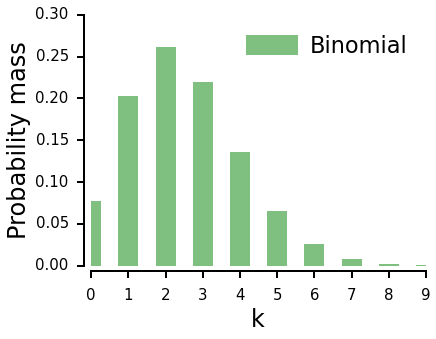

In [51]:
p = 0.05
n = 50

# We can use the properties of the binomial function to define, for example, the plot ranges 
x = np.arange(stat.binom.ppf(0.0001, n, p), stat.binom.ppf(0.9999, n, p))
rv = stat.binom(n, p)

fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(sub1, "k", "Probability mass", font_size = my_font_size)

# Calculate and plot histogram
sub1.vlines(x, 0, rv.pmf(x), color = "g", linewidth = 20, alpha = 0.5, label = "Binomial")

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = 1.5 * my_font_size)

plt.show()

## Inferential statistics

The goal of descriptive statistics is to gain sufficient insight into our data to enable us to develop hypotheses about what process generated the data. These hypotheses are called null models.

The process can be a physical model, which may or may not predict the value of the parameters necessary to describe the statistical properties of the data. The process can also be a statistical model.

Using inferential statistics, one determines whether a given null hypothesis is consistent with the data.

Sample mean:  3.609
Sample std. dev:  0.265


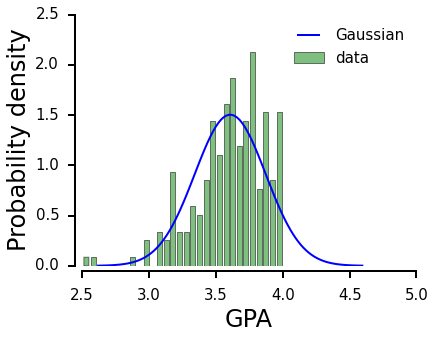

In [14]:
fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(sub1, "GPA", "Probability density", font_size = my_font_size)

# Calculate and plot histogram
#
sub1.hist(gpa, 30, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = False)

# Gaussian null model: Use the sample's mean and st_dev 
#
mu = np.mean(gpa)
sigma = np.std(gpa)
print('Sample mean: {0:6.3f}\nSample std. dev: {1:6.3f}'.format(mu, sigma))

x3 = np.linspace(stat.norm.ppf(0.0001, loc = mu, scale = sigma),
                 stat.norm.ppf(0.9999, loc = mu, scale = sigma), 
                 100)
rv3 = stat.norm(loc = mu, scale = sigma)
sub1.plot(x3, rv3.pdf(x3), color = "b", lw = 2, label= "Gaussian")

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.show()

That does not look too good.  However, maybe we are being negatively biased by the fluctuations in the data... We could plot the cumulative distribution, which will smooth out the fluctuations.

Sample mean:  3.609
Sample std. dev:  0.265


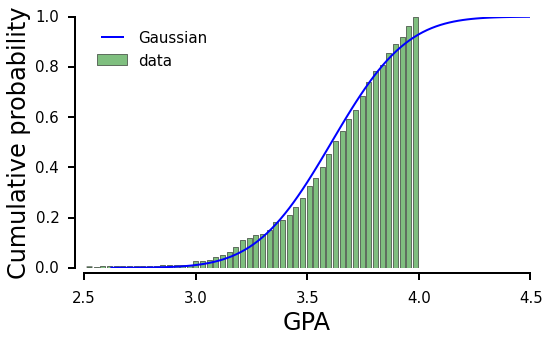

In [22]:
fig = plt.figure( figsize = (8, 4.5) )
sub1 = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(sub1, "GPA", "Cumulative probability", font_size = my_font_size)

# Calculate and plot histogram, notice how we change the flag value for 'cumulative'
#
sub1.hist(gpa, 50, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = True) 

## Gaussian null model: Use the sample's mean and st_dev 
#
mu = np.mean(gpa)
sigma = np.std(gpa)
print('Sample mean: {0:6.3f}\nSample std. dev: {1:6.3f}'.format(mu, sigma))

x3 = np.linspace(stat.norm.ppf(0.0001, loc = mu, scale = sigma), 
                 stat.norm.ppf(0.9999, loc = mu, scale = sigma), 
                 100)
sub1.plot(x3, stat.norm.cdf(x3, loc = mu, scale = sigma), color = "b", lw = 2, label= "Gaussian") # Notice we are plotting the cdf now

sub1.set_xlim([2.5, 4.5])
# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.show()

This does not look too bad, especially around the 3.5 to 3.8 range of GPA values.  But is it good enough? Is this the right description of the data? 

One thing we are not considering in our analysis is the fact that our data does not include values larger than 4. The distribution is truncated!

In [16]:
# Generated sample cumulative probability
gpa.sort()
cumulative = []
for i, value in enumerate(gpa):
    cumulative.append((i+1) / len(gpa))


In [17]:
# stat.truncnorm requires as input the bounds a, b, and loc and scale
popt, pcov = curve_fit(stat.truncnorm.cdf, gpa, cumulative, p0 = [-100, 0.8, 3.7, 0.3])

a_model = popt[0]
b_model = popt[1]
mu_model = popt[2]
sig_model = popt[3]
print('Fit mean: {0:6.3f}\nFit std. dev: {1:6.3f}'.format(mu_model, sig_model))


Fit mean:  3.722
Fit std. dev:  0.322


/Users/amaral/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Sample mean:  3.609
Sample std. dev:  0.265
Fit mean:  3.722
Fit std. dev:  0.322


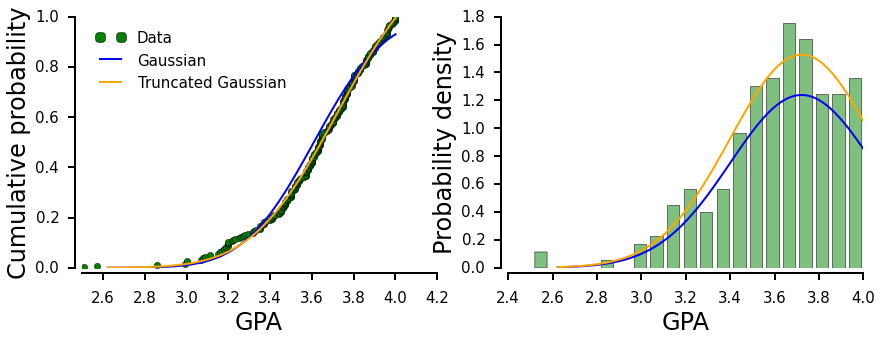

In [24]:
fig = plt.figure( figsize = (14, 4.5) )
sub1 = fig.add_subplot(1,2,1)
sub2 = fig.add_subplot(1,2,2)
my_font_size = 15
half_frame(sub1, "GPA", "Cumulative probability", font_size = my_font_size)
half_frame(sub2, "GPA", "Probability density", font_size = my_font_size)

# 
# Cumulative
#
sub1.plot(gpa, cumulative, "go", label= "Data")

## Gaussian null model: Use the sample's mean and st_dev 
mu = np.mean(gpa)
sigma = np.std(gpa)
print('Sample mean: {0:6.3f}\nSample std. dev: {1:6.3f}'.format(mu, sigma))

x3 = np.linspace(stat.norm.ppf(0.0001, loc = mu, scale = sigma), 
                 4., 
                 100)
sub1.plot(x3, stat.norm.cdf(x3, mu, sigma), color = "b", lw = 2, label= "Gaussian") 

## Fitted model
print('Fit mean: {0:6.3f}\nFit std. dev: {1:6.3f}'.format(mu_model, sig_model))
sub1.plot(x3, stat.truncnorm.cdf(x3, a_model, b_model, loc = mu_model, scale = sig_model), 
          color = "orange", lw = 2, label= "Truncated Gaussian") 

sub1.set_xlim([2.5, 4.2])
# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

#
# Density
#
sub2.hist(gpa, 20, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "Data", cumulative = False) 

sub2.plot(x3, stat.norm.pdf(x3, mu_model, sig_model), color = "b", lw = 2, label= "Gaussian") 

sub2.plot(x3, stat.truncnorm.pdf(x3, a_model, b_model, loc = mu_model, scale = sig_model), 
          color = "orange", lw = 2, label= "Gaussian") 

plt.show()

###Generating random numbers with the fitted distribution

These fits look really good. However, they do not tell us whether they provide an adequate representation of the data.  To answer that question we need to determine whether the data is statistically compatible with distributions generated using the truncated Gaussian distribution with the fitted parameters.

To this end, we will generate a number of synthetic data sets drawn from the fitted truncated Gaussian and check whether the data fits within the bounds defined by the synthetic data sets.


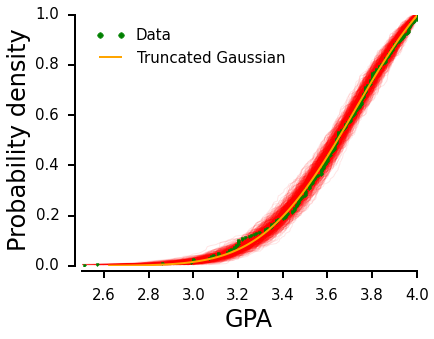

In [32]:
fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(sub1, "GPA", "Probability density", font_size = my_font_size)

for run in range(500):
    xv = stat.truncnorm.rvs(a_model, b_model, loc = mu_model, scale = sig_model, size = len(gpa))
    x_model = [x for x in xv]

    x_model.sort()
    cumulative = []
    for i, value in enumerate(x_model):
        cumulative.append((i+1) / len(x_model))

    #print(len(xv), max(xv), len(x_model))
    sub1.plot(x_model, cumulative, color = "r", lw = 1, alpha = 0.1)

sub1.plot(gpa, cumulative, "g.", label= "Data")

## Fit to data
sub1.plot(x3, stat.truncnorm.cdf(x3, a_model, b_model, loc = mu_model, scale = sig_model), 
          color = "orange", lw = 2, label= "Truncated Gaussian") 

sub1.set_xlim([2.5, 4])

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

plt.show()

####Looking good!